# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 164MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values

array(['the screen at times',
       'justice for two crimes from which many of us have not yet recovered',
       'Koury frighteningly and honestly',
       '-LRB- Siegel -RRB- and co-writers Lisa Bazadona and Grace Woodard have relied too much on convention in creating the characters who surround Frankie .',
       'finds warmth in the coldest environment and',
       ', glaring and unforgettable .',
       'from a surprisingly sensitive script co-written',
       'creative interference', 'massive cardiac arrest', 'charred'],
      dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep=('\t'))

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df = pd.read_csv (sub_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
raw_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

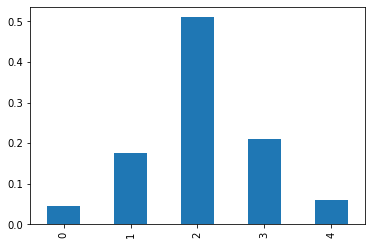

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* We use the movie review datset to train a model to label phrases on a scale of five values.
  * 0 - negative
  * 1 - somewhat negative
  * 2 - neutral
  * 3 - somewhat positive
  * 4 - positive
* in this assignment we got .tsv files. the difference between .csv file and .tsv file is that .tsv file use 'tab' as a separator instead of 'comma'
* the train dataset contains Sentiment so we can train our model on, but the test dataset doesn't contain Sentiment

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]


In [ ]:
tokenize('Is this (the) really life, or is it just fantasy?')

['is', 'this', 'the', 'realli', 'life', 'or', 'is', 'it', 'just', 'fantasi']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
", ".join(english_stopwords[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [ ]:
selected_stopwords = english_stopwords[:115]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1, 2),
                             max_features=2000)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fac2cb34710>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
99647,99648,5227,casting excellent Latin actors of all ages --,4
78107,78108,4020,'s been 13 months and 295 preview screenings s...,0
97137,97138,5079,Nicks,2
48966,48967,2390,it can only encourage us to see Samira Makhmal...,3
79198,79199,4079,surprisingly sensitive script co-written,3
21323,21324,953,have worn threadbare .,0
31590,31591,1479,other flicks,2
130607,130608,7037,same message,2
65186,65187,3299,His work with actors,2
111454,111455,5912,nearly as graphic but,2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 1, 2, 2, 3])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1= MultinomialNB(class_prior=(0.05, 0.2, .5, 0.2, .05))

In [ ]:
model1.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [ ]:
model1.predict(train_inputs)

array([2, 2, 2, ..., 1, 1, 2])

In [ ]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5881636363636363

In [ ]:
model1.predict(val_inputs)

array([2, 1, 1, ..., 2, 2, 2])

In [ ]:
accuracy_score(val_targets, model1.predict(val_inputs))

0.5453755970473295

### Make Prediction and submit to kaggel

In [ ]:
test_df.shape, test_inputs.shape

((66292, 3), (66292, 2000))

In [ ]:
test_preds = model1.predict(test_inputs)

In [ ]:
test_preds

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('submission2.csv', index=None)

### Model 2 - GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model2=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,)

In [ ]:
model2.fit(train_inputs, train_targets)

GradientBoostingClassifier(learning_rate=1.0)

In [ ]:
train_preds = model2.predict(train_inputs)

In [ ]:
train_preds

array([3, 3, 2, ..., 3, 3, 2])

In [ ]:
accuracy_score (train_targets, train_preds)

0.5685636363636364

In [ ]:
val_preds = model2.predict(val_inputs)

In [ ]:
val_preds

array([2, 3, 3, ..., 2, 2, 2])

In [ ]:
accuracy_score (val_targets, val_preds)

0.5315675206252714

### Study Prediction on sample data

In [ ]:
small_df = raw_df.sample(30)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
116360,116361,6205,I was trying to decide what annoyed me most ab...,1
85454,85455,4420,"Every moment crackles with tension , and by th...",4
93838,93839,4895,-RRB- faults are easy to forgive because the i...,3
105928,105929,5592,"with a curiously stylized , quasi-Shakespearea...",3
28948,28949,1341,"is very , very far",1
27652,27653,1269,saw in Glitter here in Wisegirls,2
108280,108281,5729,stink,1
26576,26577,1219,turn Bill Paxton into an A-list director,3
12052,12053,517,gently political,3
148094,148095,8060,that 's refreshing after the phoniness of fema...,3


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(30, 2000)

In [ ]:
small_preds = model2.predict(small_inputs)

In [ ]:
small_preds

array([3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

### Make Prediction and Submit to kaggel

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = model2.predict(test_inputs)

In [ ]:
test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('submission3.csv', index=None)

### Model 3 - Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3=RandomForestClassifier()

In [ ]:
model3.fit(train_inputs, train_targets)

RandomForestClassifier()

In [ ]:
train_preds = model3.predict(train_inputs)

In [ ]:
train_preds

array([1, 2, 2, ..., 1, 1, 2])

In [ ]:
accuracy_score(train_targets, train_preds)

0.7902727272727272

In [ ]:
val_preds = model3.predict(val_inputs)

In [ ]:
val_preds

array([2, 1, 1, ..., 2, 2, 2])

In [ ]:
accuracy_score(val_targets, val_preds)

0.5600086843247938

### Make Prediction and Submit to Kaggle

In [ ]:
test_df.shape, test_inputs.shape

((66292, 3), (66292, 2000))

In [ ]:
test_preds = model3.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('submission4.csv', index=None)

Best Model: Logistic Regression

from the above 4 models Logistic Regression got good performance than others

(include Kaggle score screenshot)
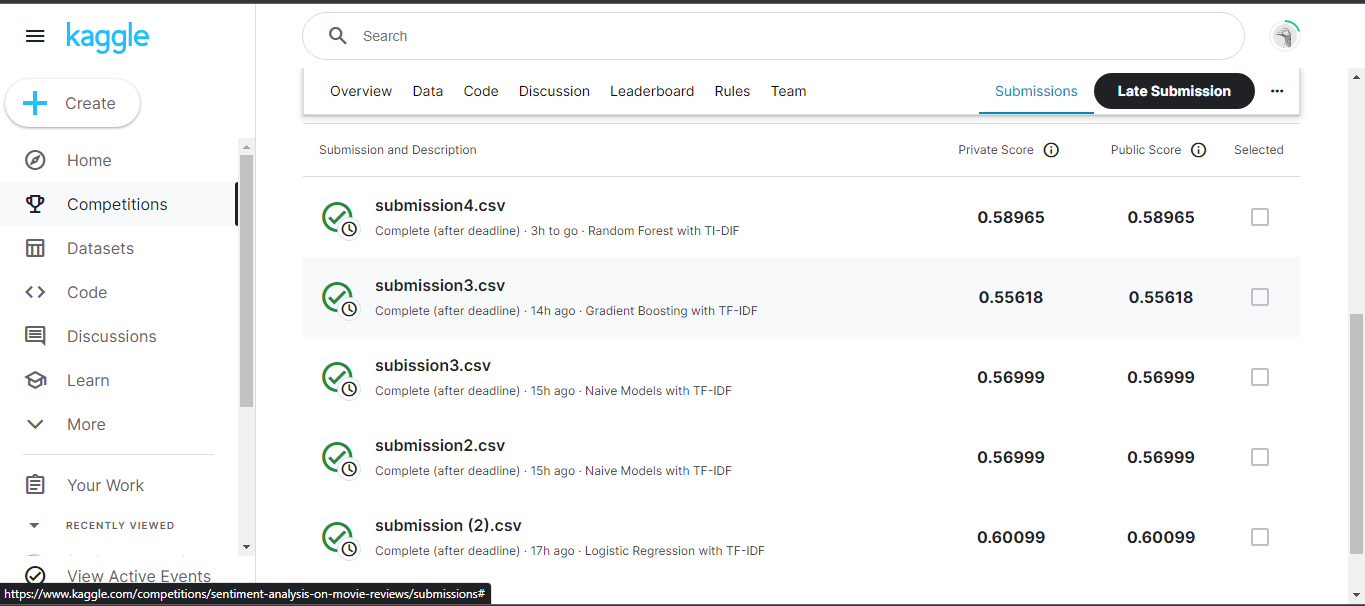

Source to the Assignment models - https://scikit-learn.org/

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
